# **Cara Manual**

In [1]:
import pandas as pd

In [8]:
dataset = '/content/cleandata.csv'

In [9]:
data = pd.read_csv(dataset)

In [10]:
data

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!
...,...,...,...,...,...
2663,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06,Just that manganese is an alternative to iron ...
2664,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20,Exactly
2665,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57,Your policies are directly responsible for the...
2666,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27,You should be voted out of office


In [11]:
data.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


In [12]:
print(data.dtypes)

Tweets            object
Retweets           int64
Likes              int64
Date              object
Cleaned_Tweets    object
dtype: object


In [ ]:
# tidak menggunakan datanoid = data.drop() karena tidak ada data yang ingin dihilangkan

In [13]:
data.describe()

,Retweets,Likes
count,2668.000000,2.668000e+03
mean,5598.058096,6.760142e+04
std,21788.655734,1.955568e+05
min,41.000000,9.330000e+02
25%,332.000000,6.240000e+03
50%,847.500000,1.559150e+04
75%,3366.250000,5.577650e+04
max,681707.000000,4.780787e+06


In [14]:
data.loc[:,"retweets":].corr()

<ipython-input-14-afe35516287b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.loc[:,"retweets":].corr()


,Retweets,Likes
Retweets,1.000000,0.954013
Likes,0.954013,1.000000


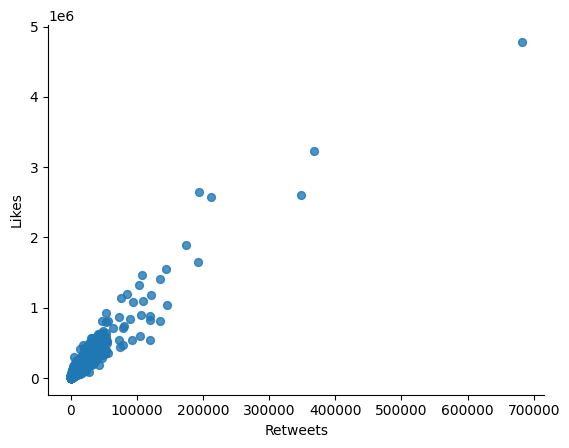

In [16]:
# @title Retweets vs Likes

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Retweets', y='Likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Menggunakan API**

In [17]:
!pip install kaggle


In [18]:
import os
from google.colab import files

# Pastikan file kaggle.json sudah diunggah
if not os.path.exists("/root/.kaggle/kaggle.json"):
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))
    # Pindahkan file kaggle.json ke direktori yang tepat
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [19]:
!kaggle datasets list -s "elon musk tweets"

ref                                                       title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/elon-musk-tweets                                   Elon Musk Tweets                                    369KB  2023-06-13 06:49:06           1585         79  1.0              
aryansingh0909/elon-musk-tweets-updated-daily             Elon Musk Tweets (Daily Updated)                      1MB  2023-06-29 20:41:13            989         44  1.0              
marta99/elon-musks-tweets-dataset-2022                    Elon Musk's Tweets Dataset 2022                     293KB  2023-03-02 13:50:58           2588         65  1.0              
kulgen/elon-musks-tweets                                  Elon Musk's Tweets              

In [27]:
!kaggle datasets download aryansingh0909/elon-musk-tweets-updated-daily

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 125MB/s]


In [28]:
!unzip /content/elon-musk-tweets-updated-daily.zip

Archive:  /content/elon-musk-tweets-updated-daily.zip
  inflating: elonmusk.csv            


In [29]:
pd.read_csv('/content/elonmusk.csv')

,Datetime,Tweet Id,Text,Username
0,2023-06-29 16:20:19+00:00,1674452749378002945,@mwseibel Yup,elonmusk
1,2023-06-29 15:53:52+00:00,1674446089179766789,@TitterDaily True,elonmusk
2,2023-06-29 03:46:37+00:00,1674263071337111552,@paulg Generational trauma. An example of why ...,elonmusk
3,2023-06-29 01:19:59+00:00,1674226170488057856,Improved longform posts,elonmusk
4,2023-06-28 18:05:58+00:00,1674116945808068608,@BillyM2k Best protip ever,elonmusk
...,...,...,...,...
24445,2011-12-03 08:22:07+00:00,142881284019060736,That was a total non sequitur btw,elonmusk
24446,2011-12-03 08:20:28+00:00,142880871391838208,"Great Voltaire quote, arguably better than Twa...",elonmusk
24447,2011-12-01 10:29:04+00:00,142188458125963264,I made the volume on the Model S http://t.co/w...,elonmusk
24448,2011-12-01 09:55:11+00:00,142179928203460608,Went to Iceland on Sat to ride bumper cars on ...,elonmusk
